In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'

In [15]:
def act_thresh(eps, α, u):
        if u == 0:
            return eps
        elif u == 1:
            return 1

        α1 = 1 - α
        x = (u * (1 - np.power(eps, α1)) + np.power(eps, α1)) ** (1 / α1)
        return x

def ab_mask_thresh(mu, eps, α, m, r_s, r_i, α_m):
    t_r_s = act_thresh(eps, α, r_s)
    t_r_i = act_thresh(eps, α, r_i)
    n_rev_r_s = (t_r_s**(1-α)- eps**(1-α))/(1 - eps**(1-α))
    n_rev_r_i = (t_r_i**(1-α)- eps**(1-α))/(1 - eps**(1-α))
    
    mean_a = (1 - α)*(1- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a2 = (1 - α)*(1- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean_a_s_rev = (1 - α)*( t_r_s**(2-α)- eps**(2-α))/((2-α)* (1-eps**(1-α)))
    mean_a_i_rev = (1 - α)*(t_r_i**(2-α)- eps**(2-α))/((2-α)* (1-eps**(1-α)))

    mean2_a_s_rev = (1 - α)*(t_r_s**(3-α)- eps**(3-α))/((3-α)* (1-eps**(1-α)))
    mean2_a_i_rev = (1 - α)*(t_r_i**(3-α)- eps**(3-α))/((3-α)* (1-eps**(1-α)))

    n_rev = sorted([n_rev_r_i, n_rev_r_s])
    m_a = sorted([mean_a_i_rev, mean_a_s_rev])
    m2_a = sorted([mean2_a_i_rev, mean2_a_s_rev])

    f_rev_n = 1 + (α_m - 1) * n_rev[1] + α_m *(α_m -1)* n_rev[0]
    f_rev_a = mean_a + (α_m - 1) * m_a[1] + α_m *(α_m -1)* m_a[0]
    f_rev_a2 = mean_a2 + (α_m - 1)* m2_a[1] + α_m *(α_m -1)* m2_a[0]

    λ_t = mu* (m*(f_rev_a + np.sqrt(f_rev_n * f_rev_a2)))**(-1)
    return λ_t, mean_a

def two_significant_digits(x, pos):
    return "{:.2f}".format(x)

        

In [18]:
class datoni:
    
    def __init__(self, name):
        
        self.file_name = f"{name}"
        #self.file_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile{file_name}.csv"
        self.file_path = f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\datafile{name}.csv"
        self.datuni = pd.read_csv(self.file_path)
        self.lambdas = self.datuni.iloc[0]
        self.sim_data = self.datuni.iloc[1:]
        self.thresh = self.datuni.iloc[0,6]
        
    
    def media(self):
        #qua devo fare la media
        media = self.sim_data.mean() / 100000
        return media
        
    def varia(self):
        N = 100000
        r_mean = self.media()
        df_sq = (self.sim_data / N) ** 2
        r_mean2 = df_sq.mean()
        r_var_t = np.sqrt(np.abs(r_mean2 - (r_mean ** 2))) / r_mean
        r_var = r_var_t / np.max(r_var_t)
        return r_var

class plottoni:
    
    def __init__(self, pname, color, marker):
        self.pname = f"{pname}"
        self.color = f"{color}"
        self.marker = f"{marker}"
        self.pfile_name = f"{pname}"
        self.pfile_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\param_{self.pfile_name}.csv"
        self.params = pd.read_csv(self.pfile_path)
        self.p = self.params["p"][0]
        #print(self.p)
        self.w = self.params["w"][0]
        #print(self.w)
        self.r_s = self.params["r_s"][0]
        self.r_i = self.params["r_i"][0]
        self.α_m = self.params["α_m"][0]
        self.α = self.params["α"][0]
        self.eps = self.params["eps"][0]
        self.mu = self.params["mu"][0]
        self.m = self.params["m"][0]
        self.datoni = datoni(name = self.pname)
        self.erre = [float(column) for column in self.datoni.datuni.columns]
        self.true_thresh = ab_mask_thresh(self.mu, self.eps, self.α, self.m, self.r_s, self.r_i, self.α_m)[0]
    
    def plotto_m(self, axs):
        
        axs.plot(self.datoni.lambdas, self.datoni.media(), color=self.color, marker=self.marker , alpha=0.7, label=f"$r_s = {self.r_s}\, r_i = {self.r_i}$")
        axs.vlines(self.true_thresh, ymin = 0, ymax = 0.7,  colors = self.color, linestyle = "-.")
        print(self.r_s, self.r_i, self.α_m)
        print(self.true_thresh)
        lower_bound, upper_bound = np.percentile(self.datoni.sim_data/100000, [2.5, 97.5], axis = 0)
        axs.fill_between(x=self.datoni.lambdas, y1=lower_bound, y2=upper_bound, color=self.color, alpha =0.2, linewidth = 0)
        axs.scatter(self.datoni.lambdas, self.datoni.media(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)
        
        axs.set_xlabel("$\lambda$")
        axs.set_ylabel("$r_{\infty}$")
        

    def plotto_v(self, axs): 
        axs.plot(self.datoni.lambdas, self.datoni.varia(), color=self.color, marker=self.marker , alpha=0.7, label=f"$r_s = {self.r_s}\, r_i = {self.r_i}$")
        axs.vlines(self.true_thresh, ymin = 0, ymax = 1,  colors = self.color, linestyle = "-.")
        axs.scatter(self.datoni.lambdas, self.datoni.varia(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)
        
        axs.set_xlabel("$\lambda$")
        axs.set_ylabel("$σ_{r_∞}/σ_{max}$")

In [6]:
df1 = pd.read_csv(f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile_ab_lmask_10_8010.csv")
df2 = pd.read_csv(f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile_ab_lmask_10_8010_fill.csv")

# Concatenate the columns of the two data frames
combined_df = pd.concat([df1, df2], axis=1)



# Write the combined data to a new file
combined_df.to_csv(f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile_ab_lmask_10_8010.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\datafile_ab_lmask_10_8010_fill.csv'

In [7]:
#print(combined_df)
value_to_drop = 0.1
column_index = combined_df.iloc[0][combined_df.iloc[0] == value_to_drop].index[0]

# Drop the column with the specified value in the second row
dfu = combined_df.drop(columns=[column_index])
print(dfu)

df_sorted = dfu[dfu.iloc[0].sort_values().index]
print(df_sorted)

NameError: name 'combined_df' is not defined

0.8 0.8 0.9
0.17877525828322438
0.1 0.8 0.9
0.17283514399105865
0.8 0.1 0.9
0.17283514399105865
0.8 0.8 0.7
0.21071324453864365
0.1 0.8 0.7
0.19039306375452442
0.8 0.1 0.7
0.19039306375452442
0.8 0.8 0.5
0.25028690561672706
0.1 0.8 0.5
0.21328379125659302
0.8 0.1 0.5
0.21328379125659302


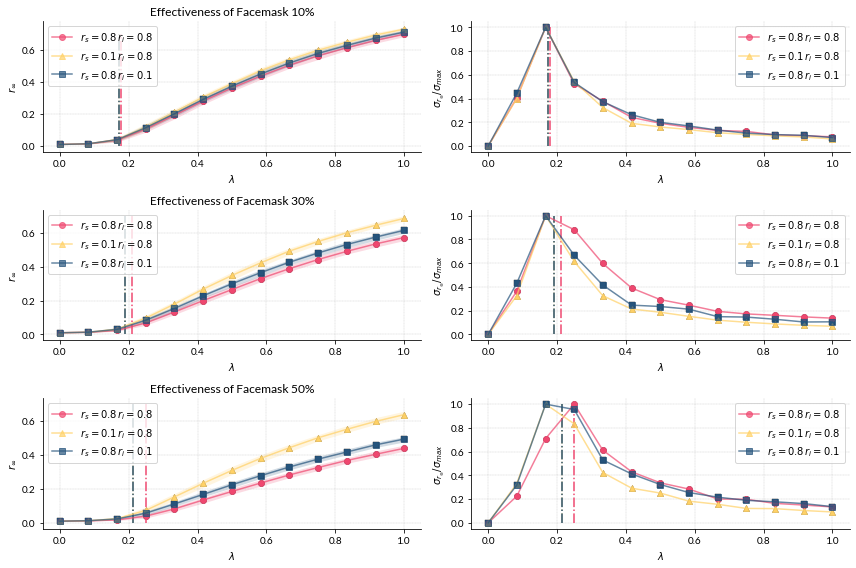

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

rows = 3
cols = 3

# Create an empty matrix to store instances of datoni
pmatrix = [[None] * cols for _ in range(rows)]
colori = ["#ef476f", "#ffd166", "#26547c"]
pallini = ["o", "^",  "s"]
# Create instances of datoni for each element in the matrix
eff = ["10", "30", "50"]
frac = ["8080", "1080", "8010"]
for i in range(rows):
    for j in range(cols):
        # Create an instance of datoni and store it in the matrix
        pmatrix[i][j] = plottoni(pname = f"_ab_lmask_{eff[i]}_{frac[j]}", color = colori[j], marker = pallini[j])
        pmatrix[i][j].plotto_m(axs[i][0])
        pmatrix[i][j].plotto_v(axs[i][1])
        
for ax in axs.flatten():
    ax.grid(True)
    ax.legend()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="both", linestyle="--", linewidth=0.3)
        

axs[0][0].set_title("Effectiveness of Facemask 10%")
axs[1][0].set_title("Effectiveness of Facemask 30%")
axs[2][0].set_title("Effectiveness of Facemask 50%")

plt.tight_layout()

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\ab_lmask_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show()